## Kelly's Advanced Lab Project ##


### Project Goals ###

* Review the literature on Virgo filaments - what has been done already?
* identify galaxies in the filaments surrounding the Virgo Cluster
    * this will require an analysis of their redshifts
* make a catalog that characterizes their
    * stellar mass
    * star formation rate from 22-micron WISE flux and GALEX UV flux
    * bulge-to-total ratio
    * disk scale length
* make a poster showing SDSS color images of filament galaxies
* compile other information on these galaxies that you will get from the literature
    * existing Halpha observations
    * radio observations
* compare galaxy properties to matched field and cluster samples
    * create a matched field sample
    * use Becky's Virgo cluster sample
* make a plot of SFR vs stellar mass for these galaxies in comparison to field and cluster samples.
* prepare proposal to get Halpha imaging of Virgo filament galaxies

### To do 9/26 ###

* get python 2 installed
* read in NSA catalog
* make a plot showing the region around Virgo, showing galaxies with:
    * raflag = (nsa.RA > 150.) & (nsa.RA < 220.) 
    * decflag= (nsa.DEC > -10.) & (nsa.DEC < 50.) 
    * velflag = (nsa.ZDIST*3.e5 > 1000.) & (nsa.ZDIST*3.e5 < 3000.)
    * vflag = raflag & decflag & velflag
* color-code points according to recession velocity


### To do 10/10 ###
* after we get Simard files:
     * Make plot of cluster, color coded by bulge to total ratio
     * make color-color plots of filaments, color coded by bulge to total ratio
     
### To do 10/24 ###
* make NUV-r vs r-22 plot for Virgo and all filaments combined
    * color code by stellar mass


In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import sys

In [12]:
#Get current path so program can tell if this is being run on Kelly's or Rose's computer
mypath=os.getcwd()
if mypath.find('rfinn') > -1:
    print "Running on Rose's computer"
    #agcfile='/Users/rfinn/idl/programs/idl_alfa/agctotal.sav'
    gitpath='/Users/rfinn/github/'
elif mypath.find('kelly') > -1:
    print "Running on Kellys's computer"
    gitpath='/Users/kellywhalen/Github/'

Running on Rose's computer


In [14]:
#Assignment from 9/26

#NSA Table
NSA_file = gitpath+'Virgo/nsa_v0_1_2_with_AGC.Virgo.fits'
NSA = fits.getdata(NSA_file)

# read in WISE catalog
wisefile=gitpath+'Virgo/nsa_v0_1_2_wise.Virgo.fits'
wise=fits.getdata(wisefile)

#read in John's stellar masses
massfile=gitpath+'Virgo/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.Virgo.fits'
jmass=fits.getdata(massfile)

#Read in Simard Tables
# table 1 = B/T using n=4 for bulge
simard1file = gitpath+'Virgo/Simard1ToNSA.fits'
simard1 = fits.getdata(simard1file)

# table 2 - let n be a free parameter
simard2file = gitpath+'Virgo/Simard2ToNSA.fits'
simard2 = fits.getdata(simard1file)


# pure sersic profile
simard3file = gitpath+'Virgo/Simard3ToNSA.fits'
simard3 = fits.getdata(simard3file)


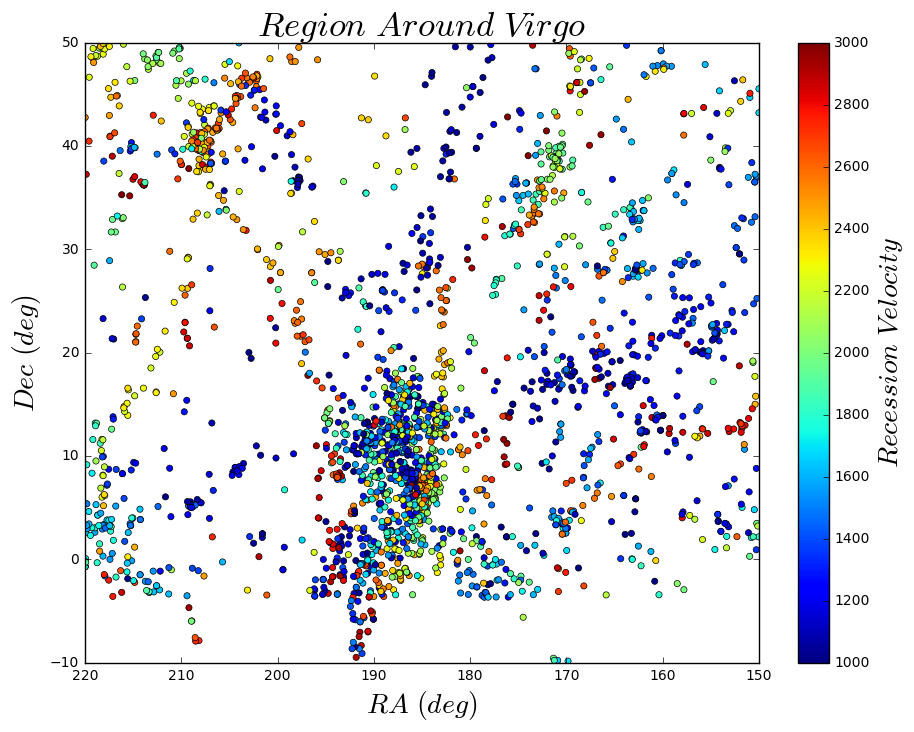

In [15]:
#set flags
raflag = (NSA.RA_1 > 150.) & (NSA.RA_1 < 220.)
decflag= (NSA.DEC_1 > -10.) & (NSA.DEC_1 < 50.)
velflag = (NSA.Z*3.e5 > 1000.) & (NSA.Z*3.e5 < 3000.)
vflag = raflag & decflag & velflag 


RA = NSA.RA_1
DEC = NSA.DEC_1
z = NSA.Z
rv = z*3.e5

plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)



/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10


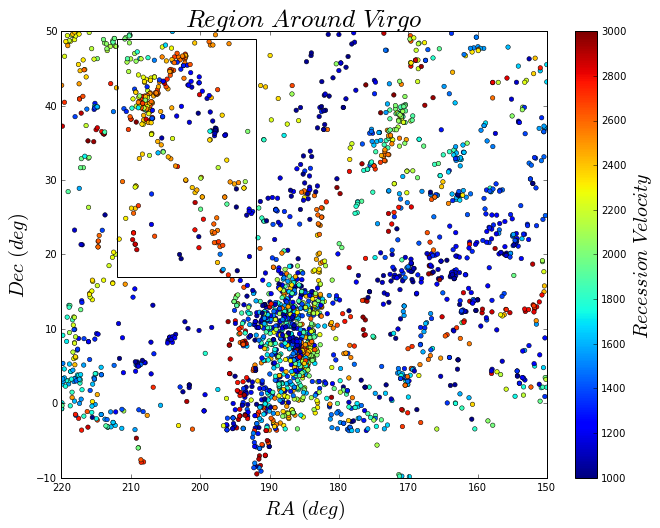

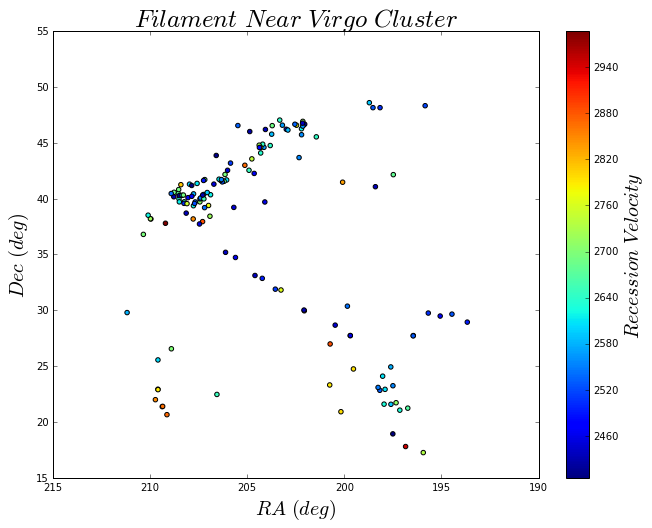

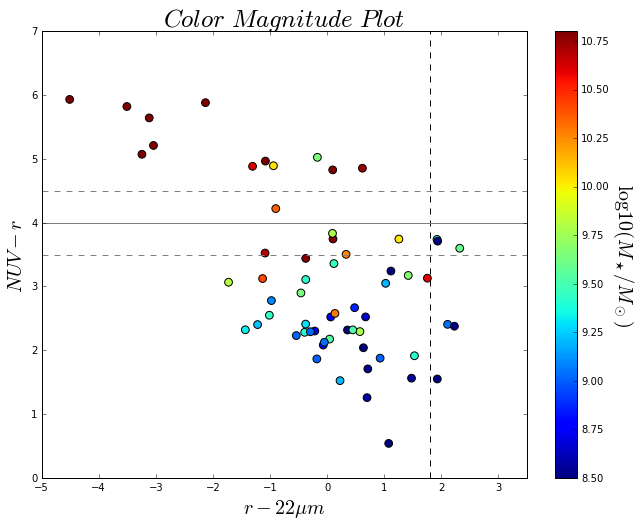

In [4]:
#Finding Galaxies in filaments
filRVFlag = (z*3.e5 < 3000.) & (z*3.e5 > 2400.)
filRAFlag = (RA > 192.) & (RA < 212.)
filDECFlag = (DEC > 17.) & (DEC < 49.)

filflag = filRVFlag & filRAFlag & filDECFlag

fig1 = plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
rect = plt.Rectangle((192,17), 20, 32,fill=False, color='k')
fig1.gca().add_artist(rect)

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)

plt.figure(figsize=(10,8))
plt.scatter(RA[filflag], DEC[filflag], c=z[filflag]*3.e5)
cb=plt.colorbar(fraction=.08)
plt.gca().invert_xaxis()
plt.title('$Filament \ Near \ Virgo \ Cluster$', fontsize=25)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
cb.set_label('$Recession \ Velocity$',size=20)

#Color-Color plot filament
#NUV-r
NSA.nsamag = 22.5-2.5*np.log10(NSA.NMGY)
NUVr = NSA.ABSMAG[:,1] - NSA.ABSMAG[:,4]
wflag = vflag & (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.)

cflag =  wflag & filflag 

r22 = NSA.nsamag[:,4] - (wise.W4MPRO + 6.620) #convert to AB magnitude

#Define stellar mass
logstellarmass = jmass.MSTAR_50

plt.figure(figsize = (10,8))
plt.scatter(r22[cflag], NUVr[cflag], c=logstellarmass[cflag], s = 60, vmin = 8.5, vmax = 10.8)
cb = plt.colorbar(fraction = 0.08)
plt.axis([-5,3.5,0,7])
plt.xlabel('$r - 22\mu m$', fontsize=20)
plt.ylabel('$NUV-r$', fontsize=20)
plt.axvline(x=1.8,ls='--',color='k')
plt.axhline(y=4,ls='-',color='0.5')
plt.axhline(y=4.5,ls='--',color='0.5')
plt.axhline(y=3.5,ls='--',color='0.5')
cb.ax.text(2.5, .5,'$\log{10}(M_\star/M_\odot)$', rotation = -90, verticalalignment = 'center', fontsize = 20)
plt.title('$Color \ Magnitude \ Plot$', fontsize = 25)



/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10


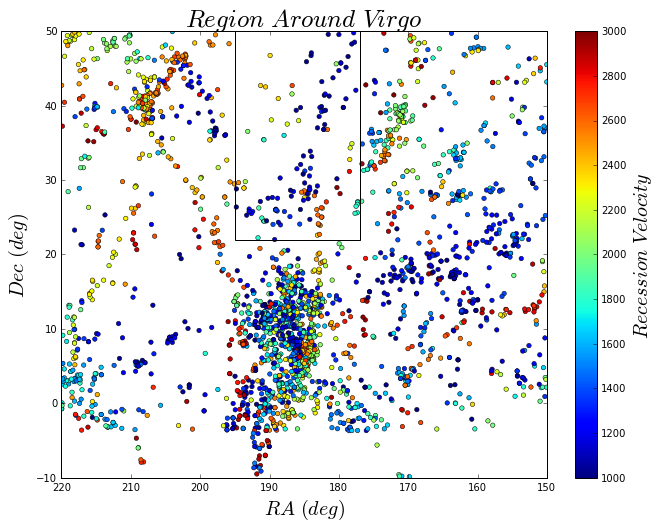

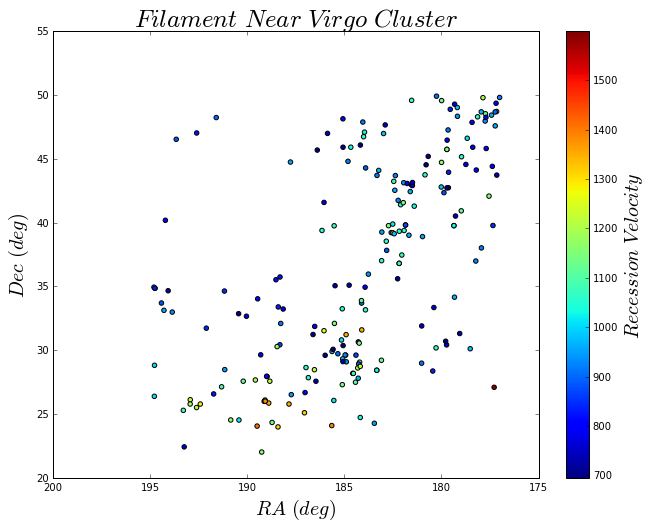

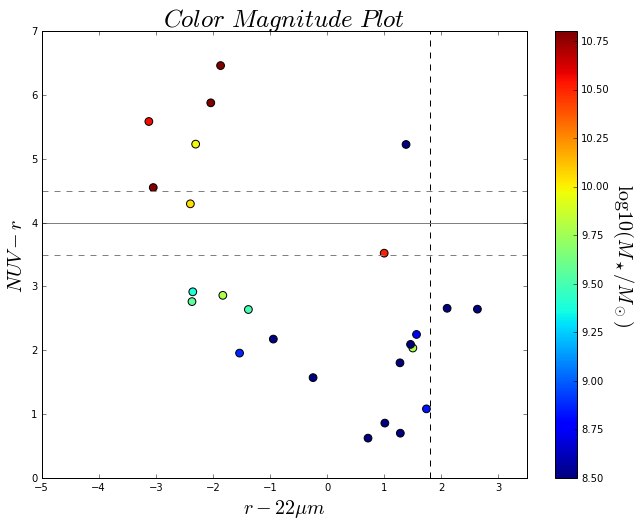

In [5]:
#Finding Galaxies in filaments
filRVFlag = (z*3.e5 < 1600.) #& (z*3.e5 > 2400.)
filRAFlag = (RA > 177.) & (RA < 195.)
filDECFlag = (DEC > 22.) & (DEC < 50.)

filflag = filRVFlag & filRAFlag & filDECFlag

fig2 = plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
rect = plt.Rectangle((177,22), 18, 28,fill=False, color='k')
fig2.gca().add_artist(rect)

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)

plt.figure(figsize=(10,8))
plt.scatter(RA[filflag], DEC[filflag], c=z[filflag]*3.e5)
cb=plt.colorbar(fraction=.08)
plt.gca().invert_xaxis()
plt.title('$Filament \ Near \ Virgo \ Cluster$', fontsize=25)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
cb.set_label('$Recession \ Velocity$',size=20)

#Color-Color plot filament
#NUV-r
NSA.nsamag = 22.5-2.5*np.log10(NSA.NMGY)
NUVr = NSA.ABSMAG[:,1] - NSA.ABSMAG[:,4]
wflag = vflag & (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.)

cflag =  wflag & filflag 

r22 = NSA.nsamag[:,4] - (wise.W4MPRO + 6.620) #convert to AB magnitude

#Define stellar mass
logstellarmass = jmass.MSTAR_50

plt.figure(figsize = (10,8))
plt.scatter(r22[cflag], NUVr[cflag], c=logstellarmass[cflag], s = 60, vmin = 8.5, vmax = 10.8)
cb = plt.colorbar(fraction = 0.08)
plt.axis([-5,3.5,0,7])
plt.xlabel('$r - 22\mu m$', fontsize=20)
plt.ylabel('$NUV-r$', fontsize=20)
plt.axvline(x=1.8,ls='--',color='k')
plt.axhline(y=4,ls='-',color='0.5')
plt.axhline(y=4.5,ls='--',color='0.5')
plt.axhline(y=3.5,ls='--',color='0.5')
cb.ax.text(2.5, .5,'$\log{10}(M_\star/M_\odot)$', rotation = -90, verticalalignment = 'center', fontsize = 20)
plt.title('$Color \ Magnitude \ Plot$', fontsize = 25)


/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/kellywhalen/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in log10


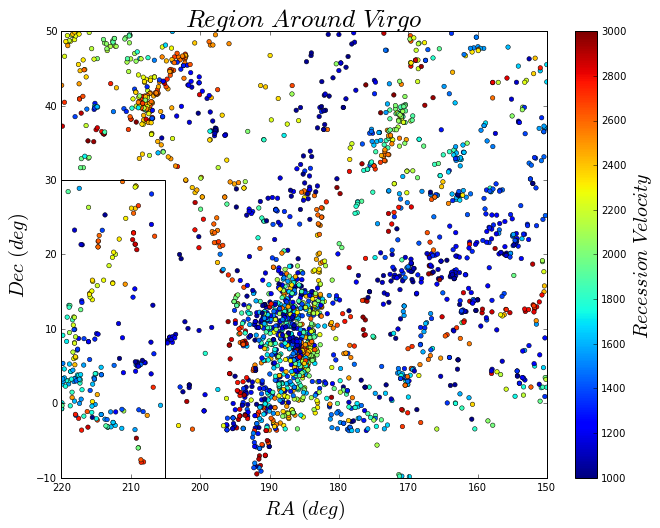

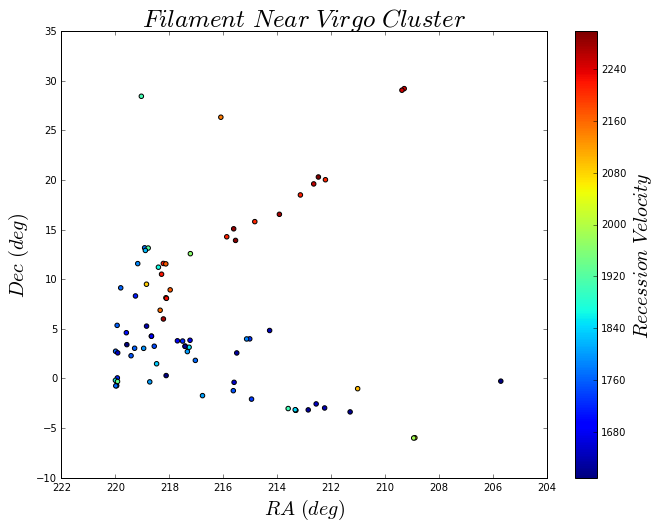

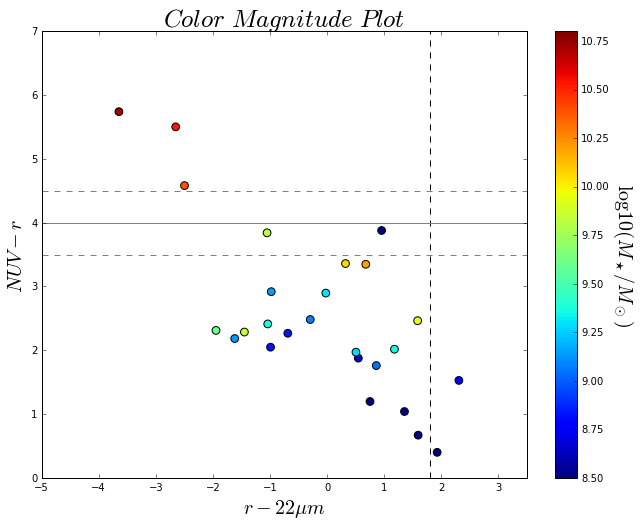

In [6]:
#Finding Galaxies in filaments
filRVFlag = (z*3.e5 > 1600.) & (z*3.e5 < 2300.)
filRAFlag = (RA > 205.) & (RA < 220.)
filDECFlag = (DEC > -10.) & (DEC < 30.)

filflag = filRVFlag & filRAFlag & filDECFlag

fig3 = plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
rect = plt.Rectangle((205,-10), 15, 40,fill=False, color='k')
fig3.gca().add_artist(rect)

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)

plt.figure(figsize=(10,8))
plt.scatter(RA[filflag], DEC[filflag], c=z[filflag]*3.e5)
cb=plt.colorbar(fraction=.08)
plt.gca().invert_xaxis()
plt.title('$Filament \ Near \ Virgo \ Cluster$', fontsize=25)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
cb.set_label('$Recession \ Velocity$',size=20)

#Color-Color plot filament
#NUV-r
NSA.nsamag = 22.5-2.5*np.log10(NSA.NMGY)
NUVr = NSA.ABSMAG[:,1] - NSA.ABSMAG[:,4]
wflag = vflag & (wise.W4MPRO > 0.1) & (wise.W4SNR > 2.)

cflag =  wflag & filflag 

r22 = NSA.nsamag[:,4] - (wise.W4MPRO + 6.620) #convert to AB magnitude

#Define stellar mass
logstellarmass = jmass.MSTAR_50

plt.figure(figsize = (10,8))
plt.scatter(r22[cflag], NUVr[cflag], c=logstellarmass[cflag], s = 60, vmin = 8.5, vmax = 10.8)
cb = plt.colorbar(fraction = 0.08)
plt.axis([-5,3.5,0,7])
plt.xlabel('$r - 22\mu m$', fontsize=20)
plt.ylabel('$NUV-r$', fontsize=20)
plt.axvline(x=1.8,ls='--',color='k')
plt.axhline(y=4,ls='-',color='0.5')
plt.axhline(y=4.5,ls='--',color='0.5')
plt.axhline(y=3.5,ls='--',color='0.5')
cb.ax.text(2.5, .5,'$\log{10}(M_\star/M_\odot)$', rotation = -90, verticalalignment = 'center', fontsize = 20)
plt.title('$Color \ Magnitude \ Plot$', fontsize = 25)

In [ ]:
# color using B/T ratio

#Finding Galaxies in filaments
filRVFlag = (z*3.e5 < 3000.) & (z*3.e5 > 2400.)
filRAFlag = (RA > 192.) & (RA < 212.)
filDECFlag = (DEC > 17.) & (DEC < 49.)

filflag = filRVFlag & filRAFlag & filDECFlag

fig1 = plt.figure(figsize = (10,8))
plt.scatter(NSA.RA_1[vflag], NSA.DEC_1[vflag],c=NSA.Z[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()
rect = plt.Rectangle((192,17), 20, 32,fill=False, color='k')
fig1.gca().add_artist(rect)

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('$Region \ Around \ Virgo$', fontsize=25)

In [16]:
simard1.columns

ColDefs(
    name = '_RAJ2000'; format = '10A'
    name = '_DEJ2000'; format = '10A'
    name = 'objID'; format = '10A'
    name = 'z'; format = '10A'
    name = 'Sp'; format = '10A'
    name = 'Scale'; format = '10A'
    name = 'Vmax'; format = '10A'
    name = 'gg2d'; format = '10A'
    name = 'e_gg2d'; format = '10A'
    name = 'rg2d'; format = '10A'
    name = 'e_rg2d'; format = '10A'
    name = 'gg2df'; format = '10A'
    name = 'rg2df'; format = '10A'
    name = 'dCol'; format = '10A'
    name = '__B_T_g'; format = '10A'
    name = 'e__B_T_g'; format = '10A'
    name = '__B_T_r'; format = '10A'
    name = 'e__B_T_r'; format = '10A'
    name = '__B_T_gf'; format = '10A'
    name = '__B_T_rf'; format = '10A'
    name = 'Rhlg'; format = '10A'
    name = 'Rhlr'; format = '10A'
    name = 'Re'; format = '10A'
    name = 'e_Re'; format = '10A'
    name = 'e'; format = '10A'
    name = 'e_e'; format = '10A'
    name = 'phib'; format = '10A'
    name = 'e_phib'; format = '10A'
    name =

In [23]:
simard1.__B_T_r[0:100]

array(['  0.53', '', '', '  0.48', '  0.12', '', '  0.97', '', '', '',
       '  0.10', '  0.45', '', '', '  0.48', '', '', '', '  0.00',
       '  0.94', '', '', '', '', '  0.09', '', '', '  0.26', '', '', '',
       '  0.32', '', '  0.94', '', '', '  0.37', '', '', '', '  0.00', '',
       '', '', '  0.34', '  0.71', '  0.63', '  0.40', '  0.00', '',
       '  0.71', '', '', '', '', '', '  0.07', '', '', '', '', '  0.00',
       '', '', '', '', '  0.17', '', '', '  0.10', '', '', '', '  0.00',
       '', '  0.46', '', '', '', '', '', '', '', '  0.03', '', '', '', '',
       '', '', '  0.78', '  0.42', '', '  0.26', '', '  0.59', '  0.69',
       '', '', ''], 
      dtype='|S10')